<a href="https://colab.research.google.com/github/Kittipat77/20th-Century-UFO-Sightings-Analysis/blob/main/DatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

กิตติพัฒน์ สุวรรณ 6409610570

สิรกานต์ ธนบุญสมบัติ 6409682926

# โครงงานวิชา CS245 : Principle of Data Science
## <u>โครงงานการวิเคราะห์ข้อมูล</u> : UFO Sightings Dataset
### Context :  Reports of unidentified flying object reports in the last century
This dataset contains over 80,000 reports of UFO sightings over the last century.

##0. Import all required packages and load the data set

In [ ]:
import pandas
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

ufo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TermProject/ufo_sightings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#1. แสดงค่าสถิติเบื้องต้นของชุดข้อมูล

In [ ]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [ ]:
ufo.describe()

,longitude
count,80332.000000
mean,-86.772885
std,39.697205
min,-176.658056
25%,-112.073333
50%,-87.903611
75%,-78.755000
max,178.441900


In [ ]:
ufo.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


#2. Data cleansing and Data validity.

In [ ]:
ufo = ufo.drop(ufo.columns[[6,7,8,9,10]], axis=1)

ufo.head(10)

,datetime,city,state,country,shape,duration (seconds)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20
3,10/10/1956 21:00,edna,tx,us,circle,20
4,10/10/1960 20:00,kaneohe,hi,us,light,900
5,10/10/1961 19:00,bristol,tn,us,sphere,300
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180
7,10/10/1965 23:45,norwalk,ct,us,disk,1200
8,10/10/1966 20:00,pell city,al,us,disk,180
9,10/10/1966 21:00,live oak,fl,us,disk,120


In [ ]:
#Check the number of NaN values in every column.
ufo.isnull().sum().sort_values(ascending=False)

country               9670
state                 5797
shape                 1932
datetime                 0
city                     0
duration (seconds)       0
dtype: int64

ชุดข้อมูลนี้มีคอลัมน์ที่มี NaN ดังนี้
* country จำนวน 9670 ข้อมูล
* state จำนวน 5797 ข้อมูล
* shape จำนวน 1932 ข้อมูล

In [ ]:
#Fill all missing values in country and state with mode.
ufo.country.fillna(ufo.country.mode()[0], inplace=True)
ufo.state.fillna(ufo.country.mode()[0], inplace=True)

#Fill all missing values in shape with 'unknown'.
ufo['shape'].fillna('unknown', inplace=True)

#Check the number of NaN values in every column.
ufo.isnull().sum()

datetime              0
city                  0
state                 0
country               0
shape                 0
duration (seconds)    0
dtype: int64

จัดการกับคอลัมน์ที่มี NaN ดังนี้
* country : ใช้หลักการ Replace NaN with a Scalar Value ในการ cleansing ข้อมูลในคอลัมน์ country เนื่องจากข้อมูลเป็นตำแหน่งสถานที่
* state : ใช้หลักการ Replace NaN with a Scalar Value ในการ cleansing ข้อมูลในคอลัมน์ state เนื่องจากข้อมูลเป็นตำแหน่งสถานที่
* shape : จัดการข้อมูล NaN ในคอลัมน์ shape โดยการเปลี่ยนเป็น unknow เพื่อจัดระเบียบค่าที่หายไป และแก้ไขข้อผิดพลาดของรูปแบบข้อมูลที่ซ้ำกัน โดยการรวมข้อมูล other และ unknow เข้าด้วยกันเนื่องจากเป็นรูปแบบข้อมูลที่คล้ายกัน
* comments : จัดการข้อมูลที่เป็น NaN เป็น no comments

In [ ]:
ufo['shape'].value_counts()

light        16565
triangle      7865
circle        7608
unknown       7516
fireball      6208
other         5649
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

In [ ]:
ufo['shape'].value_counts()

light        16565
triangle      7865
circle        7608
unknown       7516
fireball      6208
other         5649
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

แสดง value ของ shape เพื่อตรวจสอบข้อมูลที่ต้องแก้ไข

In [ ]:
#Replace shape with value 'other' with 'unknown'.
ufo['shape'] = ufo['shape'].replace('other','unknown')

#Replace shape with value 'changed' with 'changing'.
ufo['shape'] = ufo['shape'].replace('changed','changing')

ufo['shape'].value_counts()

light        16565
unknown      13165
triangle      7865
circle        7608
fireball      6208
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1963
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
Name: shape, dtype: int64

replace คอลัมน์ shape ที่มีค่า 'other' ด้วยค่า 'unknown' และ  replace ค่า 'changed' ด้วยค่า 'changing'

In [ ]:
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype('float')

ValueError: ignored

ต้องการเปลี่ยนหน่วยของค่าใน duration (seconds) จาก object เป็น float แต่ขึ้น Error จึงนำค่าที่ทำให้เกิด Error ไป drop ออกในขั้นตอนถัดไป

In [ ]:
ufo = ufo.drop(np.array(ufo[ufo['duration (seconds)'] == '2`'].index))
ufo = ufo.drop(np.array(ufo[ufo['duration (seconds)'] == '8`'].index))
ufo = ufo.drop(np.array(ufo[ufo['duration (seconds)'] == '0.5`'].index))

ufo['duration (seconds)'] = ufo['duration (seconds)'].astype('float')

(ufo['duration (seconds)']%1 == 0).all()

False

drop ค่าที่ทำให้เกิด Error แล้วเปลี่ยน dataType เป็น float และตรวจสอบว่าทุกค่าเป็นจำนวนเต็มหรือไม่

In [ ]:
ufo['duration (seconds)'] = ufo['duration (seconds)'].round()
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(np.uint32)

#Print data types.
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80329 entries, 0 to 80331
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            80329 non-null  object
 1   city                80329 non-null  object
 2   state               80329 non-null  object
 3   country             80329 non-null  object
 4   shape               80329 non-null  object
 5   duration (seconds)  80329 non-null  uint32
dtypes: object(5), uint32(1)
memory usage: 4.0+ MB


round ค่าที่มีไม่ใช่จำนวนเต็มแล้วเปลี่ยน dataType จาก float เป็น int

In [ ]:
print('duplicated rows before dropping:', ufo.duplicated().sum())

ufo = ufo.drop_duplicates()

print('duplicated rows after dropping:', ufo.duplicated().sum())

duplicated rows before dropping: 422
duplicated rows after dropping: 0


#3. Data wrangling

ทำการ wrangling data เพื่อความสะดวกหากมีความจำเป็นในการเลือกนำข้อมูลส่วนนั้นๆไปใช้ต่อในอนาคต

In [ ]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'], errors='coerce')
ufo.insert(6, 'year', ufo['datetime'].dt.year)
ufo.insert(7, 'month', ufo['datetime'].dt.month)
ufo.insert(8, 'time', ufo['datetime'].dt.hour)

ufo.head(10)

,datetime,city,state,country,shape,duration (seconds),year,month,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,1949.0,10.0,20.0
1,1949-10-10 21:00:00,lackland afb,tx,us,light,7200,1949.0,10.0,21.0
2,1955-10-10 17:00:00,chester (uk/england),us,gb,circle,20,1955.0,10.0,17.0
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1956.0,10.0,21.0
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,1960.0,10.0,20.0
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,1961.0,10.0,19.0
6,1965-10-10 21:00:00,penarth (uk/wales),us,gb,circle,180,1965.0,10.0,21.0
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,1965.0,10.0,23.0
8,1966-10-10 20:00:00,pell city,al,us,disk,180,1966.0,10.0,20.0
9,1966-10-10 21:00:00,live oak,fl,us,disk,120,1966.0,10.0,21.0


#4. ใช้เครื่องมือสำหรับ data visualization และการอภิปรายรูปกราฟที่เลือก

การเลือกใช้โมเดลที่สอดคล้องกับชุดข้อมูลและวัตถุประสงค์ของโครงงาน
1. สถานที่มีประวัติการพบเห็น UFO - Bar Charts เลือกใช้ Bar Charts เนื่องจากสามารถแสดงลักษณะจำนวนครั้งที่พบเห็น UFO ของแต่ละสถานที่ได้ง่าย
2. เดือนที่มีประวัติการพบเห็น UFO - Bar Charts  เลือกใช้ Bar Charts เนื่องจากสามารถแสดงจำนวนครั้งที่พบเห็น UFO ของแต่ละเดือนได้ง่าย
3. ช่วงเวลาที่มีประวัติการพบเห็น UFO - Bar Charts  เลือกใช้ Bar Charts เนื่องจากสามารถแสดงจำนวนครั้งที่พบเห็น UFO ในแต่ละช่วงเวลาของวันได้ละเอียดที่สุด



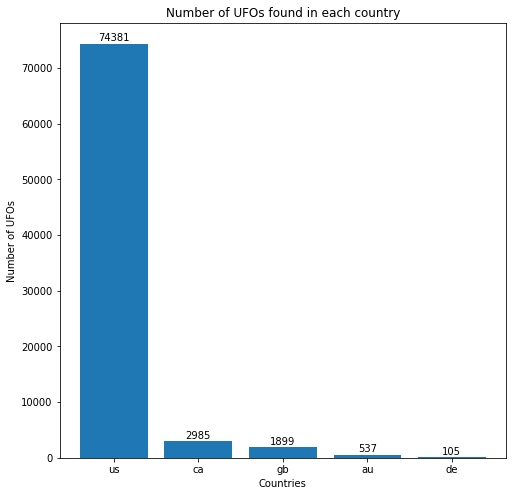

In [ ]:
ufo_country = ufo['country'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(ufo_country.index, ufo_country.values)

for i in ufo_country.index:
  plt.text(i, ufo_country[i]+500, ufo_country[i], ha='center')

plt.title('Number of UFOs found in each country')
plt.xlabel('Countries')
plt.ylabel('Number of UFOs')

_ = plt.show()

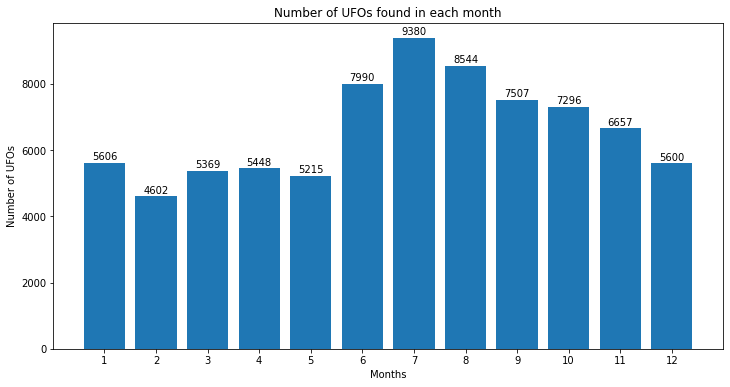

In [ ]:
ufo_month = ufo['month'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
plt.bar(ufo_month.index, ufo_month.values)

for i in ufo_month.index:
  plt.text(i, ufo_month[i]+100, ufo_month[i], ha='center')

plt.title('Number of UFOs found in each month')
plt.xlabel('Months')
plt.ylabel('Number of UFOs')

_ = plt.xticks(ufo_month.index)

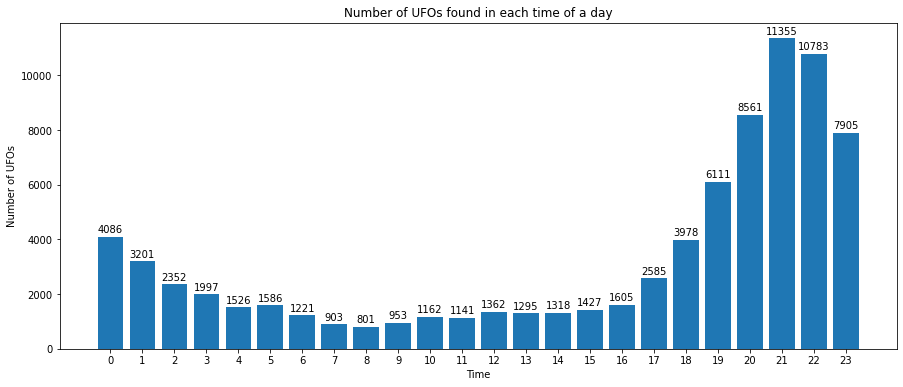

In [ ]:
ufo_time = ufo['time'].value_counts()

fig, ax = plt.subplots(figsize=(15,6))
plt.bar(ufo_time.index, ufo_time.values)

for i in ufo_time.index:
  plt.text(i, ufo_time[i]+150, ufo_time[i], ha='center')

plt.title('Number of UFOs found in each time of a day')
plt.xlabel('Time')
plt.ylabel('Number of UFOs')

_ = plt.xticks(ufo_time.index)

#การอภิปรายผลของการใช้งานโมเดล

### ``สถานที่มีประวัติการพบเห็น UFO``
-  หลังจากใช้ Bar Charts ในการการ Visualization ข้อมูลชี้ให้เห็นว่ามีสถิติบันทึกการพบเห็น UFO มากที่สุดที่ประเทศสหรัฐอเมริกา ซึ่งมีจำนวนการบันทึกถึง 74,381 ครั้งซึ่งห่างจากอันดับอื่นๆอย่างมาก รองลงมาเป็นแคลิฟอเนียที่มีสถิติการพบเห็นที่  2,985 ครั้งและอังกฤษที่ 1,899 ครั้ง สุดท้ายคือออสเตเลีย 537 และ เยอรมนีที่ 105 ครั้ง


### ``เดือนที่มีประวัติการพบเห็น UFO ``
- หลังจากใช้ Bar Charts ในการการ Visualization ข้อมูลชี้ให้เห็นว่าในแต่ละเดือนของปี มีสถิติการพบเห็น UFO ที่ไม่แตกต่างกันมากนัก โดยเดือนที่มีบันทึกการพบ UFO มากที่สุดคือเดือนที่ 7 ของปี (กรกฎาคม) อยู่ที่ 9,380 ครั้ง ส่วนเดือนที่มีการพบเห็น UFO น้อยที่สุดจาก 12 เดือนคือเดือนที่ 2 (กุมภาพันธ์) ซึ่งมีบันทึกการพบ UFO ที่ 4,602 ครั้ง

### ``ช่วงเวลาที่มีประวัติการพบเห็น UFO ``
- หลังจากใช้ Bar Charts ในการการ Visualization ข้อมูลชี้ให้เห็นว่าในแต่ละช่วงเวลาของวัน มีสถิติการพบเห็น UFO ที่แตกต่างกันชัดเจนในแต่ละช่วงเวลา ในเวลากลางคืนอย่างในช่วงตั้งแต่ 17.00 น. - 23.00 น. มีสถิติบันทึกการพบเห็น UFO มากที่สุด โดยชั่วโมงที่พบ UFO มากที่สุดคือช่วง 21.00 น. ที่  11,355 ครั้ง ส่วนช่วงเวลาที่มีการพบเห็น UFO น้อยที่สุดคือช่วงเช้าถึงช่วงสายของวัน 6.00 น. - 11.00 น.โดยช่วงเวลาที่น้อยที่สุดคือเวลา 8.00 น. ของวันที่มีสถิติการพบน้อยที่สุดคือ 801 ครั้ง